# Getting Audio Effects in Python via Pysox
This is a test of one way to get access to some audio effects from the command-line utility [sox](http://sox.sourceforge.net/), using [Pysox](https://pythonhosted.org/pysox/).  Click [here for a list sox effects](http://sox.sourceforge.net/sox.html#EFFECTS).
What we're going to do is write to a file, call sox, and load the output file. 

Since another project is already using librosa for audio file I/O, we'll use that too. But you could use another audio reader/writer.

First we'll load some audio and play it...

In [1]:
import pysox
import librosa
signal, sr = librosa.load('talking_test.wav')

from IPython.display import Audio
Audio(signal, rate=sr)

General routine to apply an effect, by saving to a file and calling sox, and loading the output file:

In [2]:
def apply_sox_effect(signal, sr, effectparams):
    inpath, outpath = 'in.wav', 'out.wav'
    librosa.output.write_wav(inpath, signal, sr)         # write the input audio to a file
    
    app = pysox.CSoxApp(inpath, outpath, effectparams=effectparams)   # apply the sox effect & get new file
    app.flow()
    
    out_signal, sr = librosa.load(outpath)
    return out_signal, sr

Now select a (sox) affect and its parameters, and call the apply_effect

In [3]:
effectparams=[ ("vol", [ b'18dB' ]), ]
new_signal, sr = apply_sox_effect(signal, sr, effectparams)

And play the resulting sound

In [4]:
Audio(new_signal, rate=sr)

Alternatively, we could generate some audio and then process it in a similar way...

In [5]:
import numpy as np
sample_length = 4 * sr                         # 4 seconds 
noise = (np.random.rand(sample_length)-0.5)      # random values between -0.5 and 0.5

Let's plot it...

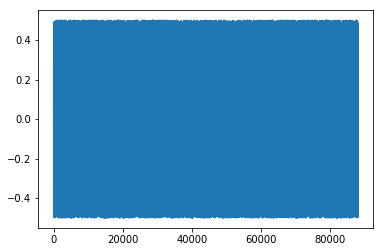

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(noise)


And look at a spectrogramm...

(array([[7.67202722e-06, 2.31416687e-06, 1.52210047e-05, ...,
         2.59186887e-07, 6.07350283e-06, 1.64546908e-05],
        [1.06181926e-05, 8.46466288e-07, 2.30328858e-05, ...,
         2.17346722e-06, 1.57410274e-06, 7.11220090e-06],
        [4.11794005e-06, 1.62981596e-05, 5.79946991e-06, ...,
         1.65122198e-06, 6.13957788e-06, 2.29288237e-07],
        ...,
        [1.80610911e-06, 5.96040907e-06, 5.95866043e-06, ...,
         1.73754232e-06, 2.08779666e-07, 3.48345840e-06],
        [4.23832675e-06, 1.45790933e-05, 6.47297383e-07, ...,
         1.79668403e-06, 3.61357639e-06, 1.65373393e-06],
        [1.37647191e-07, 3.87678640e-06, 3.73614965e-07, ...,
         4.08170853e-06, 8.04796267e-12, 5.51827006e-07]]),
 array([    0.        ,    43.06640625,    86.1328125 ,   129.19921875,
          172.265625  ,   215.33203125,   258.3984375 ,   301.46484375,
          344.53125   ,   387.59765625,   430.6640625 ,   473.73046875,
          516.796875  ,   559.86328125,   602.929

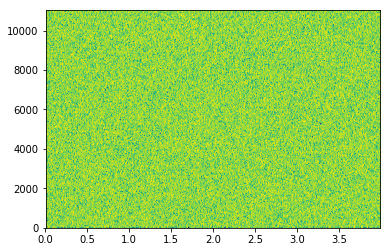

In [8]:
plt.specgram(noise, NFFT=512, Fs=sr, noverlap=256)

And listen to it...

In [9]:
Audio(noise, rate=sr)

And apply our effect...

In [10]:
effectparams=[ ("lowpass", [ b'500' ]), ]
new_noise, sr = apply_sox_effect(noise, sr, effectparams)
Audio(new_noise, rate=sr)

Plot the new one...

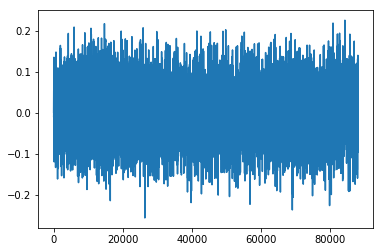

In [11]:
plt.plot(new_noise)

(array([[7.07645468e-06, 2.16098528e-06, 1.63646254e-05, ...,
         1.18428899e-07, 5.86857318e-06, 1.63172077e-05],
        [1.05536217e-05, 1.18198152e-06, 2.57663862e-05, ...,
         2.20546374e-06, 1.74542646e-06, 7.31972782e-06],
        [4.28939307e-06, 1.39269502e-05, 6.76383773e-06, ...,
         1.64075345e-06, 5.81832461e-06, 2.61360225e-07],
        ...,
        [4.15116783e-16, 1.88218007e-15, 1.72666384e-14, ...,
         1.10553140e-14, 4.41775564e-15, 1.74818000e-15],
        [5.49676954e-15, 5.10641132e-15, 1.10830034e-14, ...,
         1.19878458e-15, 3.09970209e-15, 4.75965940e-15],
        [1.72018260e-15, 5.48508776e-15, 5.60163042e-16, ...,
         7.06396902e-16, 4.12055401e-15, 1.87929521e-15]]),
 array([    0.        ,    43.06640625,    86.1328125 ,   129.19921875,
          172.265625  ,   215.33203125,   258.3984375 ,   301.46484375,
          344.53125   ,   387.59765625,   430.6640625 ,   473.73046875,
          516.796875  ,   559.86328125,   602.929

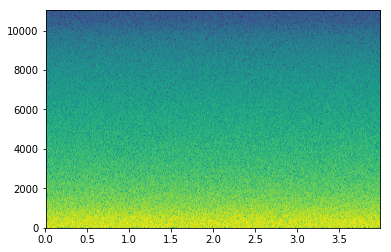

In [12]:
plt.specgram(new_noise, NFFT=512, Fs=sr, noverlap=256)